Credit risk modeling  determines two key factors. 

1.the likelihood that the borrower will default on the loan. 
2. the lender’s financial impact if the default occurs.

Data links: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df1 = pd.read_csv("D://UCI_credit_card.csv")
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [109]:
# drop unncecessary column
df1.drop(["ID"], axis=1, inplace= True)

In [110]:
#check whether there is any missing value
df1.isnull().sum() 
    


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [112]:
df1= df1[df1['EDUCATION']!=5]
df1= df1[df1['EDUCATION']!=6] 

In [113]:
df1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [114]:
df1.columns.to_list()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [115]:
df1['default.payment.next.month'].unique()

array([1, 0], dtype=int64)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

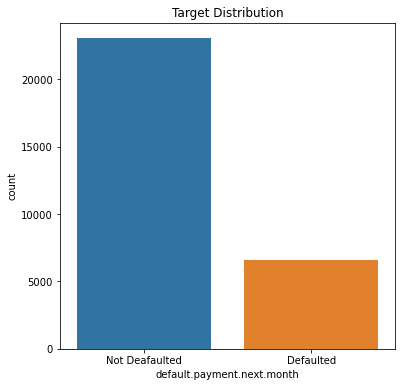

In [116]:
# Lets visualize the target column "default.payment.next.month"
plt.figure(figsize=(6,6))
sns.countplot(df1['default.payment.next.month'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

In [117]:
# Lets count it
df1['default.payment.next.month'].value_counts()

0    23059
1     6610
Name: default.payment.next.month, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 432x432 with 0 Axes>

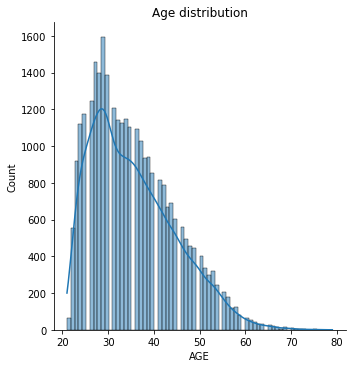

In [118]:
# We need to make the data more balanced
# with age column
plt.figure(figsize=(6,6))
sns.displot(df1['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender Distribution')

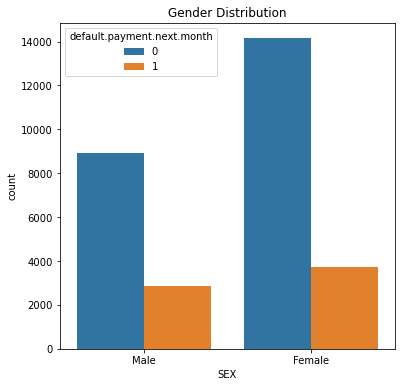

In [119]:
# With sex columns 
#Gender (1=male, 2=female)
plt.figure(figsize=(6,6))
sns.countplot('SEX',hue='default.payment.next.month',data=df1)
plt.xticks([0,1], labels=["Male", "Female"])
#plt.xlabel({1:'Male',2:'Feamle'})
plt.title("Gender Distribution")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education Distribution')

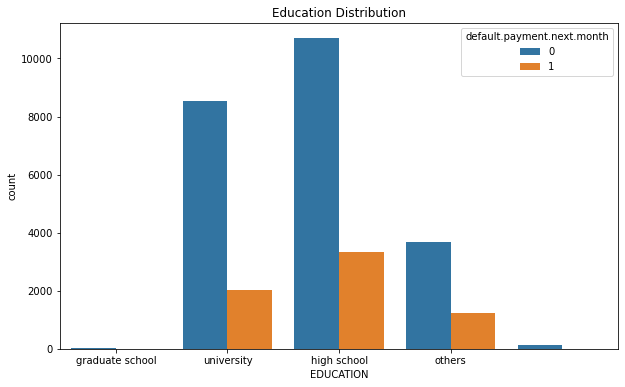

In [120]:
# With EDUCATION columns 
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.figure(figsize=(10,6))
sns.countplot('EDUCATION', hue='default.payment.next.month',data=df1)
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MARRIAGE Distribution')

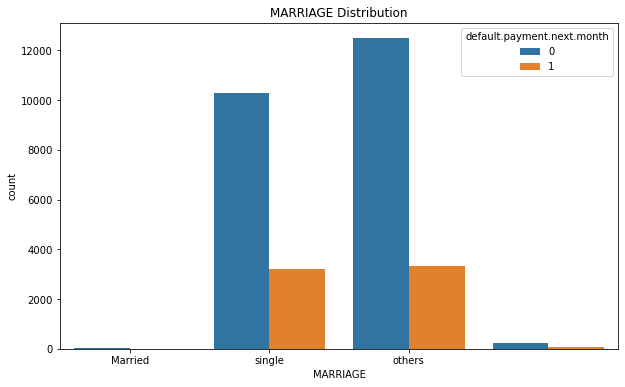

In [121]:
# With MARRIAGE columns 
#
plt.figure(figsize=(10,6))
sns.countplot('MARRIAGE',hue='default.payment.next.month',data=df1)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

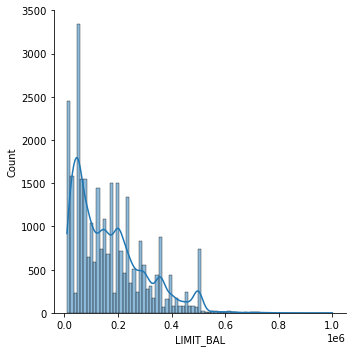

In [122]:
# With column 'limit_bal'
sns.displot(df1.LIMIT_BAL, kde=True)

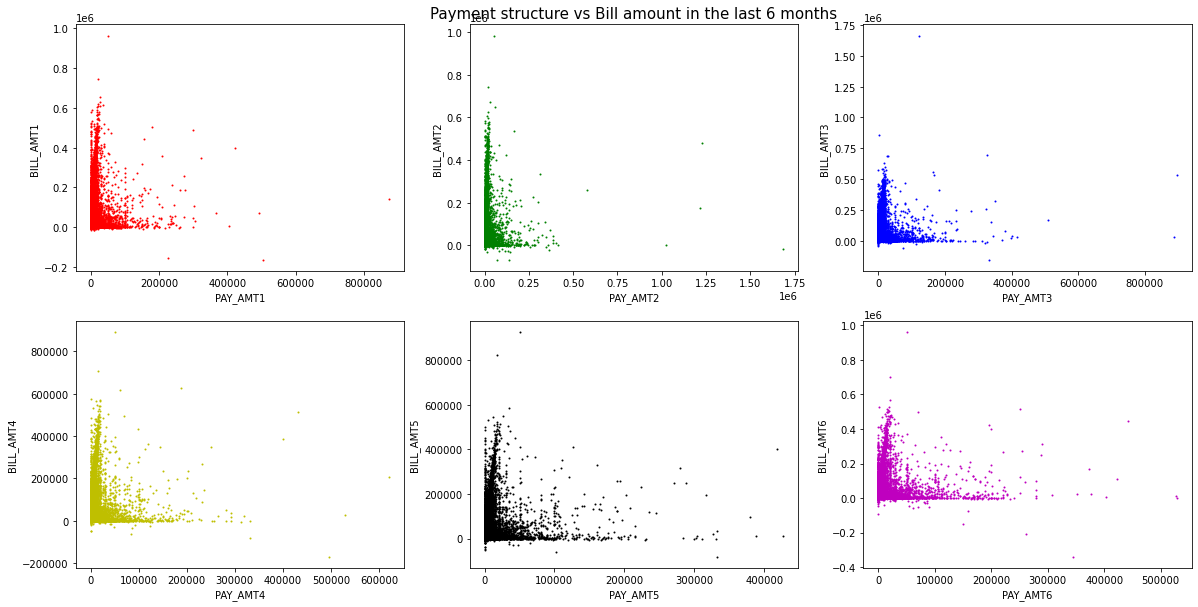

In [123]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df1.PAY_AMT1, y=df1.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df1.PAY_AMT2, y=df1.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df1.PAY_AMT3, y=df1.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df1.PAY_AMT4, y=df1.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df1.PAY_AMT5, y=df1.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df1.PAY_AMT6, y=df1.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

In [124]:
# Creating independent and dependent features
# Independnet features
X = df1.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df1['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Feature Scalling

In [125]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [126]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

Data Balancing

since our dataset was imbalace, so used SMOTE technique to make it balanced.
For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement [2]. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.

In [127]:
#from sklearn import preprocessing, metrics

In [128]:
df1 = df1.replace(to_replace='None', value=np.nan).dropna()

In [129]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)


# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
smt = SMOTETomek(random_state=42)
# fit and apply the transform 
X_train,y_train= over_sampler.fit_resample(X_train,y_train)
# summarize class distribution
print("After oversampling: ",Counter(y_train))


Before oversampling:  Counter({0: 18409, 1: 5326})
After oversampling:  Counter({0: 18409, 1: 18409})


Building Model
a) Logistic Regression
b) Random Forest Classifier
c) XGBoost Classifier
d) Support vector machine classifier

Logistic regression Model: The main aim of logistic regression is to determine the relationship between features and the probability of a particular outcome.

In [130]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [131]:
# Predicting the model
pred_logit= logit.predict(X_test)

In [132]:
#Evaluation metrics

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.6831816649814627
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4650
           1       0.37      0.63      0.46      1284

    accuracy                           0.68      5934
   macro avg       0.62      0.67      0.62      5934
weighted avg       0.76      0.68      0.71      5934



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


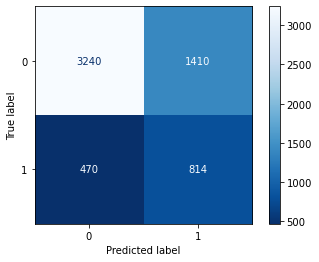

In [133]:
# Plot confusion metrics
plot_confusion_matrix(logit, X_test, y_test, cmap="Blues_r")

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


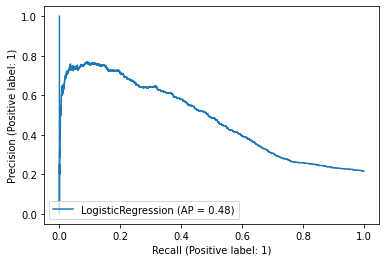

In [134]:
# plot roc_auc curve
plot_precision_recall_curve(logit,X_test,y_test)

### Random Forest

In [135]:
Random 

NameError: name 'Random' is not defined

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)

In [137]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))


The accuracy of logit model is: 0.8083923154701719
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4650
           1       0.58      0.43      0.49      1284

    accuracy                           0.81      5934
   macro avg       0.71      0.67      0.69      5934
weighted avg       0.79      0.81      0.80      5934



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


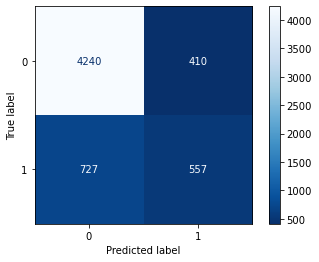

In [138]:
# Plot confusion metrics
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues_r")

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


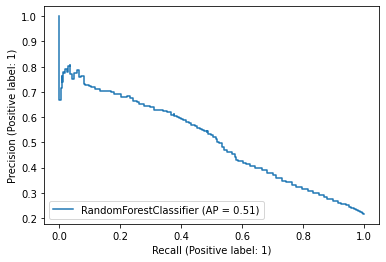

In [139]:
plot_precision_recall_curve(rf,X_test,y_test)

### XGBoost Classifier (Extreem Gradiant Boosting)

In [140]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

In [142]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy of logit model is: 0.7615436467812605
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4650
           1       0.46      0.57      0.51      1284

    accuracy                           0.76      5934
   macro avg       0.67      0.69      0.67      5934
weighted avg       0.78      0.76      0.77      5934



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


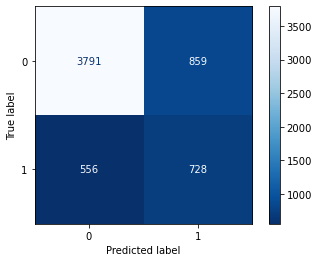

In [143]:
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap="Blues_r")

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


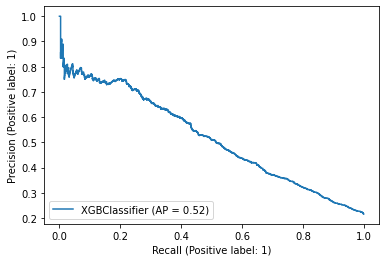

In [144]:
plot_precision_recall_curve(xgb_clf,X_test,y_test)

In [145]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [146]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [147]:
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [148]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [151]:
classifier=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.2,
                                  learning_rate=0.15,
                                  max_depth=15,
                                  reg_lambda=10,
                                  min_child_weight=1,
                                  subsample=0.9, 
                                  colsample_bytree=0.50,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

[16:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [152]:
# Predicting model
y_pred= classifier.predict(X_test)

### Evaluating the model after hyperparameter tuning

In [153]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

The accuracy of the model is: 0.7947421638018201
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4650
           1       0.53      0.50      0.51      1284

    accuracy                           0.79      5934
   macro avg       0.70      0.69      0.69      5934
weighted avg       0.79      0.79      0.79      5934



In [154]:
#Cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[16:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [155]:
score

array([0.79474216, 0.80620155, 0.8082238 , 0.80485339, 0.81024604,
       0.82237951, 0.83249073, 0.82676104, 0.82339063, 0.81759946])

In [156]:
score.mean()

0.814688830450305